,filename,color_mode,format,channels,file_size_mb,width,height,full_path,thumbnail
0,auto-1546749_1280.jpg,RGB,JPEG,3,0.19,1280,853,D:/lab4python2024gb\auto-1546749_1280.jpg,
1,bmw-4537790_1280.jpg,RGB,JPEG,3,0.35,1280,870,D:/lab4python2024gb\bmw-4537790_1280.jpg,
2,bmw-6935139_1280.jpg,RGB,JPEG,3,0.29,1280,960,D:/lab4python2024gb\bmw-6935139_1280.jpg,
3,car-7227559_1280.jpg,RGB,JPEG,3,0.22,1280,853,D:/lab4python2024gb\car-7227559_1280.jpg,
4,car-racing-4394450_1280.jpg,RGB,JPEG,3,0.25,1280,853,D:/lab4python2024gb\car-racing-4394450_1280.jpg,
5,green-yellow-red-purple-violet-sedan-sport-cars-standing-dark-space_114579-1159.jpg,RGB,JPEG,3,0.29,1380,960,D:/lab4python2024gb\green-yellow-red-purple-violet-sedan-sport-cars-standing-dark-space_114579-1159.jpg,
6,purepng.com-mercedesmercedes-benzmercedesmercedes-luxury-vehiclesbusescoachestrucks-1701527525315psdmx.png,RGBA,PNG,4,0.05,280,210,D:/lab4python2024gb\purepng.com-mercedesmercedes-benzmercedesmercedes-luxury-vehiclesbusescoachestrucks-1701527525315psdmx.png,
7,purepng.com-mercedesmercedes-benzmercedesmercedes-luxury-vehiclesbusescoachestrucks-1701527525481fdoqg.png,RGBA,PNG,4,0.04,280,179,D:/lab4python2024gb\purepng.com-mercedesmercedes-benzmercedesmercedes-luxury-vehiclesbusescoachestrucks-1701527525481fdoqg.png,
8,purepng.com-mercedesmercedes-benzmercedesmercedes-luxury-vehiclesbusescoachestrucks-1701527525536owc3p.png,RGBA,PNG,4,1.13,1400,1077,D:/lab4python2024gb\purepng.com-mercedesmercedes-benzmercedesmercedes-luxury-vehiclesbusescoachestrucks-1701527525536owc3p.png,
9,purepng.com-mercedesmercedesautomobilegerman-companygerman-company-benz-1701527516961xmpai.png,RGBA,PNG,4,0.05,280,147,D:/lab4python2024gb\purepng.com-mercedesmercedesautomobilegerman-companygerman-company-benz-1701527516961xmpai.png,

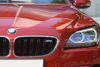
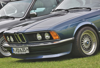
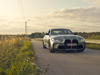
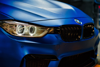
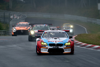
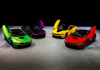
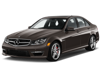
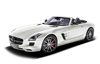
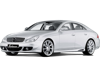
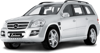
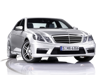
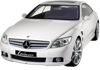
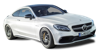
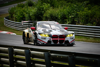
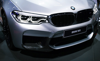

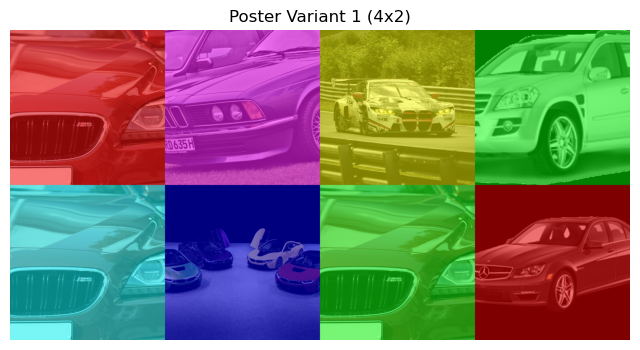

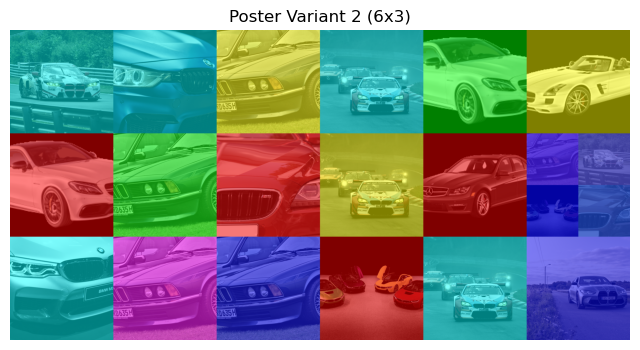

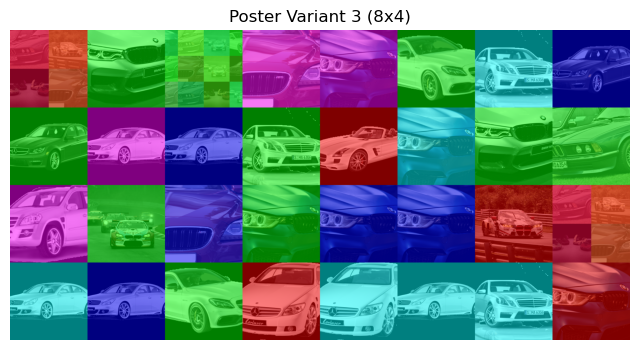

In [3]:
import pandas as pd
import os
import zipfile
import random
from PIL import Image, ImageEnhance
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import io
import base64

# Завдання 1
def extract_zip(zip_file_path, extract_to_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)

def collect_image_data(folder_path):
    image_data = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                full_path = os.path.join(root, file)
                try:
                    with Image.open(full_path) as img:
                        color_mode = img.mode
                        img_format = img.format
                        num_channels = len(img.getbands())
                        file_size_mb = round(os.path.getsize(full_path) / (1024 * 1024), 2)
                        img_width, img_height = img.size
                        img.thumbnail((100, 100))
                        thumbnail_buffer = io.BytesIO()
                        img.save(thumbnail_buffer, format="PNG")
                        thumbnail_str = base64.b64encode(thumbnail_buffer.getvalue()).decode()
                        thumbnail_html = f'<img src="data:image/png;base64,{thumbnail_str}" width="80"/>'
                        thumbnail_buffer.close()
                        
                        image_data.append({
                            'filename': file,
                            'color_mode': color_mode,
                            'format': img_format,
                            'channels': num_channels,
                            'file_size_mb': file_size_mb,
                            'width': img_width,
                            'height': img_height,
                            'full_path': full_path,
                            'thumbnail': thumbnail_html
                        })
                except Exception as e:
                    print(f"Помилка при обробці зображення {file}: {e}")
    return pd.DataFrame(image_data)

zip_file_path = 'D:/lab4python2024.zip'
extracted_folder = 'D:/lab4python2024gb'
extract_zip(zip_file_path, extracted_folder)
image_info_df = collect_image_data(extracted_folder)

display(HTML(image_info_df.to_html(escape=False)))

# Завдання 2

def resize_to_square(img):
    width, height = img.size
    new_size = min(width, height)
    left, top = (width - new_size) // 2, (height - new_size) // 2
    return img.crop((left, top, left + new_size, top + new_size))

def add_random_color_filter(img):
    color_filters = {
        "red": (1, 0, 0),
        "green": (0, 1, 0),
        "blue": (0, 0, 1),
        "yellow": (1, 1, 0),
        "magenta": (1, 0, 1),
        "cyan": (0, 1, 1),
    }
    
    chosen_filter = random.choice(list(color_filters.values()))
    
    if img.mode != "RGB":
        img = img.convert("RGB")
    
    color_overlay = Image.new("RGB", img.size, tuple(int(255 * c) for c in chosen_filter))
    colored_img = ImageEnhance.Color(img).enhance(0.5)
    return Image.blend(colored_img, color_overlay, 0.5)

def generate_poster(folder_path, output_file_name, cols, rows, image_size=(500, 500)):
    image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    poster_width, poster_height = image_size[0] * cols, image_size[1] * rows
    poster_img = Image.new("RGB", (poster_width, poster_height))
    
    for row in range(rows):
        for col in range(cols):
            random_image_path = random.choice(image_files)
            with Image.open(random_image_path) as img:
                img = resize_to_square(img).resize(image_size)
                img = add_random_color_filter(img)
                x, y = col * image_size[0], row * image_size[1]
                poster_img.paste(img, (x, y))
    
    poster_img.save(output_file_name)
    return poster_img

poster_folder_path = extracted_folder
poster_variants = [(4, 2), (6, 3), (8, 4)]
for i, (cols, rows) in enumerate(poster_variants, start=1):
    output_path = os.path.join(poster_folder_path, f'poster_variant_{i}.jpg')
    poster = generate_poster(poster_folder_path, output_path, cols, rows)
    plt.figure(figsize=(8, 8))
    plt.imshow(poster)
    plt.axis('off')
    plt.title(f'Poster Variant {i} ({cols}x{rows})')
    plt.show()
